In [2]:
import os
import torch
import torch.utils.data
from train_scripts.dataset import PennFudanDataset, get_transform, collate_fn
from train_scripts.model import get_model, evaluate
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def indoor_evaluate(name):
        device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
        num_classes = 2
        model = get_model(num_classes)

        model.load_state_dict(torch.load(f"models/{name}.pth", weights_only=True))
        model.to(device)

        dataset_test = PennFudanDataset(f'datasets/indoor_test', get_transform(train=False), split="valid")
        # indices = torch.randperm(len(dataset_test)).tolist()
        # dataset_test = torch.utils.data.Subset(dataset_test, indices)

        data_loader_test = torch.utils.data.DataLoader(
                dataset_test, batch_size=1, shuffle=False, num_workers=0,
                collate_fn=collate_fn)

        evaluate(model, data_loader_test, device=device)


In [3]:
folder = "outdoors"
indoor_evaluate(f"{folder}_5")

c:\Users\perva\anaconda3\envs\CSC2529\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\perva\anaconda3\envs\CSC2529\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


creating index...
index created!
['bbox']
Test:  [ 0/53]  eta: 0:00:32  model_time: 0.5970 (0.5970)  evaluator_time: 0.0015 (0.0015)  time: 0.6051  data: 0.0057  max mem: 462
Test:  [52/53]  eta: 0:00:00  model_time: 0.1212 (0.1303)  evaluator_time: 0.0000 (0.0007)  time: 0.1271  data: 0.0045  max mem: 470
Test: Total time: 0:00:07 (0.1365 s / it)
Averaged stats: model_time: 0.1212 (0.1303)  evaluator_time: 0.0000 (0.0007)
Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.524
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.915
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.604
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.252
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.548
 Average Recall     (AR) 

In [4]:
folder = "poisson"
indoor_evaluate(f"{folder}_9")


creating index...
index created!
['bbox']
Test:  [ 0/53]  eta: 0:00:20  model_time: 0.3818 (0.3818)  evaluator_time: 0.0020 (0.0020)  time: 0.3928  data: 0.0050  max mem: 470
Test:  [52/53]  eta: 0:00:00  model_time: 0.3793 (0.3791)  evaluator_time: 0.0010 (0.0007)  time: 0.3875  data: 0.0051  max mem: 470
Test: Total time: 0:00:20 (0.3893 s / it)
Averaged stats: model_time: 0.3793 (0.3791)  evaluator_time: 0.0010 (0.0007)
Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.534
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.869
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.621
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.334
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.556
 Average Recall     (AR) 

In [ ]:
folder = "laplacian"
indoor_evaluate(f"{folder}_8")


In [ ]:
folder = "cutpasteblur"
indoor_evaluate(f"{folder}_8")

In [ ]:
folder = "inpaint_light"
indoor_evaluate(f"{folder}_8")

In [ ]:
folder = "inpaint_dib"
indoor_evaluate(f"{folder}_8")

In [18]:
dataset_test = PennFudanDataset(f'datasets/poisson', get_transform(train=False), split="train")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


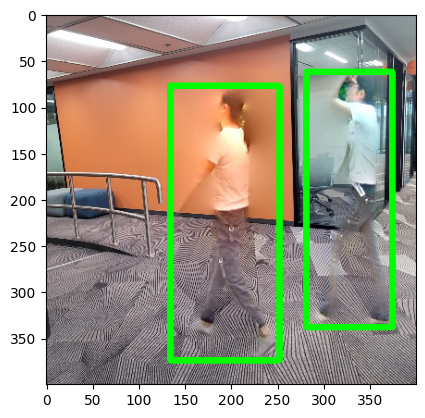

In [19]:

# 
# model = get_model(2)
# model.load_state_dict(torch.load("models/outdoors_5.pth", weights_only=True))
# model.load_state_dict(torch.load("models/poisson_9.pth", weights_only=True)) 
# model.load_state_dict(torch.load("models/laplacian_8.pth", weights_only=True)) 
# model.load_state_dict(torch.load("models/cutpasteblur_8.pth", weights_only=True))
# model.load_state_dict(torch.load("models/inpaint_light_8.pth", weights_only=True))
# model.load_state_dict(torch.load("models/inpaint_dib_8.pth", weights_only=True))
# model.to("cuda")
# model.eval()

i = 38
img, _ = dataset_test[i]

# put the model in evaluation mode
# with torch.no_grad():
#     prediction = model([img.to("cuda")])



img = img.detach().cpu().numpy().transpose((1, 2, 0))
img = np.ascontiguousarray(img)
# cv2.imwrite("Result/pic.jpg",img)
# bbs = prediction[0]['boxes']
bbs = _['boxes']
# scores = prediction[0]['scores']
# print(scores)
# i += 1
for j in range(len(bbs)):
    bb = bbs[j]
    # if scores[j] > 0.1:
    img = cv2.rectangle(img, (int(bb[0]),int(bb[1])),(int(bb[2]),int(bb[3])), (0, 255, 0), 5)
plt.imshow(img)
plt.show()